In [5]:
%pip install matplotlib
%pip install scikit-learn
%pip install  numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 13.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 8.8 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 25.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 29.5 MB/s eta 0:00:0000:0100:01
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 17.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/35.0 MB 17.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 9.7 MB/s eta 0:00:00
  Using cached threadpoolc

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
import numpy as np

In [7]:
plt.style.use('fivethirtyeight')

In [8]:
DATA_FILE = '../data/cleaned.csv'
df = pd.read_csv(DATA_FILE)

In [9]:
X = df[['contest_num','letter1_int','letter2_int','letter3_int','letter4_int','letter5_int']]
y = df[['in1','in2','in3','in4','in5','in6','over6']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=42)

model=LinearRegression()
model.fit(X_train,y_train.in1)
preds1 = model.predict(X_test)

model=LinearRegression()
model.fit(X_train,y_train.in2)
preds2 = model.predict(X_test)

model=LinearRegression()
model.fit(X_train,y_train.in3)
preds3 = model.predict(X_test)

model=LinearRegression()
model.fit(X_train,y_train.in4)
preds4 = model.predict(X_test)

model=LinearRegression()
model.fit(X_train,y_train.in5)
preds5 = model.predict(X_test)

model=LinearRegression()
model.fit(X_train,y_train.in6)
preds6 = model.predict(X_test)

model=LinearRegression()
model.fit(X_train,y_train.over6)
preds7 = model.predict(X_test)

In [10]:
def print_errors():
    print('1 try:')
    print('\tmean_squared_error:', mean_squared_error(y_test.in1, preds1))
    print('\tmean_absolute_error:', mean_absolute_error(y_test.in1, preds1))

    print('2 tries:')
    print('\tmean_squared_error:', mean_squared_error(y_test.in2, preds2))
    print('\tmean_absolute_error:', mean_absolute_error(y_test.in2, preds2))

    print('3 tries:')
    print('\tmean_squared_error:', mean_squared_error(y_test.in3, preds3))
    print('\tmean_absolute_error:', mean_absolute_error(y_test.in3, preds3))

    print('4 tries:')
    print('\tmean_squared_error:', mean_squared_error(y_test.in4, preds4))
    print('\tmean_absolute_error:', mean_absolute_error(y_test.in4, preds4))

    print('5 tries:')
    print('\tmean_squared_error:', mean_squared_error(y_test.in5, preds5))
    print('\tmean_absolute_error:', mean_absolute_error(y_test.in5, preds5))

    print('6 tries:')
    print('\tmean_squared_error:', mean_squared_error(y_test.in6, preds6))
    print('\tmean_absolute_error:', mean_absolute_error(y_test.in6, preds6))

    print('more than 6 tries:')
    print('\tmean_squared_error:', mean_squared_error(y_test.over6, preds7))
    print('\tmean_absolute_error:', mean_absolute_error(y_test.over6, preds7))

In [11]:
def plot_results():
    x = range(len(preds1))
    fig = plt.figure(figsize=(10,8))

    fig.add_subplot(341)
    plt.title('1 try')
    plt.scatter(x,preds1)
    plt.scatter(x,y_test.in1)

    fig.add_subplot(342)
    plt.scatter(x,preds2)
    plt.scatter(x,y_test.in2)
    plt.title('2 tries')


    fig.add_subplot(343)
    plt.title('3 tries')
    plt.scatter(x,preds3)
    plt.scatter(x,y_test.in3)

    fig.add_subplot(344)
    plt.title('4 tries')
    plt.scatter(x,preds4)
    plt.scatter(x,y_test.in4)


    fig.add_subplot(345)
    plt.title('5 tries')
    plt.scatter(x,preds5)
    plt.scatter(x,y_test.in5)


    fig.add_subplot(346)
    plt.title('6 tries')
    plt.scatter(x,preds6)
    plt.scatter(x,y_test.in6)


    fig.add_subplot(347)
    plt.title('over 6 tries')
    plt.scatter(x,preds7)
    plt.scatter(x,y_test.over6)

    plt.show()


    plt.figure(figsize=(10,6))
    plt.scatter(x,preds1+preds2+preds3+preds4+preds5+preds6+preds7,label='sum of predicted frequencies')
    plt.scatter(x,y_test.in1+y_test.in2+y_test.in3+y_test.in4+y_test.in5+y_test.in6+y_test.over6,label='sum of actual frequencies')
    plt.legend()
    plt.show()

1 try:
	mean_squared_error: 0.7467487434464525
	mean_absolute_error: 0.5976135250247976
2 tries:
	mean_squared_error: 15.172580020708901
	mean_absolute_error: 2.9363479593011883
3 tries:
	mean_squared_error: 73.22008429815475
	mean_absolute_error: 7.4291984402035816
4 tries:
	mean_squared_error: 28.07474206390944
	mean_absolute_error: 4.123992287813768
5 tries:
	mean_squared_error: 42.270727547284544
	mean_absolute_error: 5.438493718975718
6 tries:
	mean_squared_error: 50.62428114293042
	mean_absolute_error: 6.066685255828923
more than 6 tries:
	mean_squared_error: 7.2288980126132625
	mean_absolute_error: 2.0550286700069336


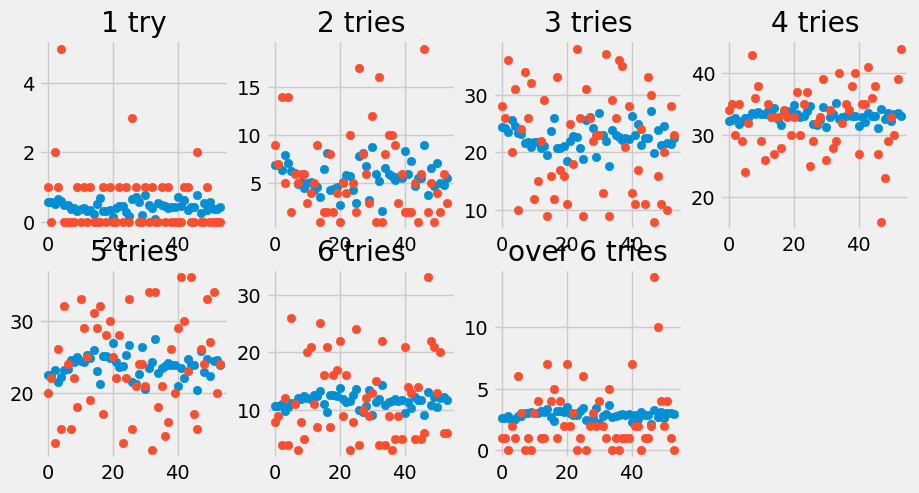

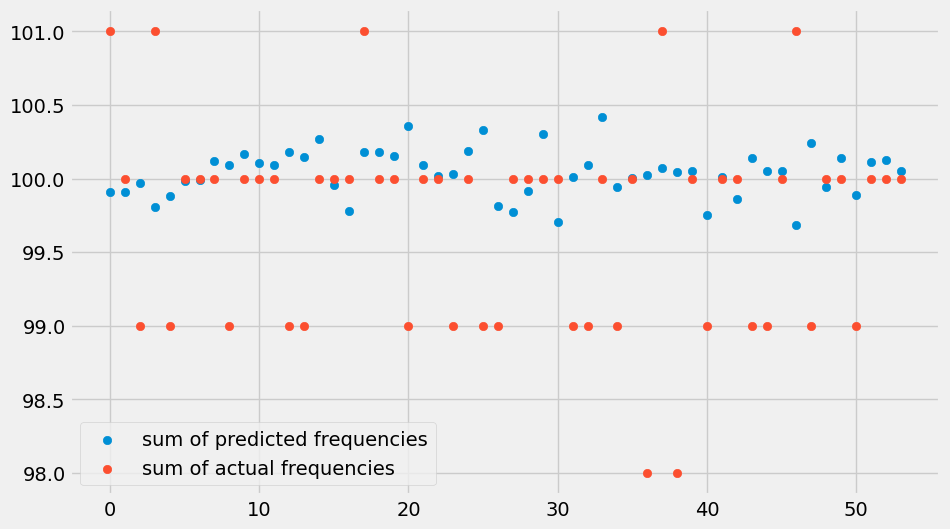

In [12]:
X = df[['word_score']]
y = df[['in1','in2','in3','in4','in5','in6','over6']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=42)

model=LinearRegression()
model.fit(X_train,y_train.in1)
preds1 = model.predict(X_test)

model=LinearRegression()
model.fit(X_train,y_train.in2)
preds2 = model.predict(X_test)

model=LinearRegression()
model.fit(X_train,y_train.in3)
preds3 = model.predict(X_test)

model=LinearRegression()
model.fit(X_train,y_train.in4)
preds4 = model.predict(X_test)

model=LinearRegression()
model.fit(X_train,y_train.in5)
preds5 = model.predict(X_test)

model=LinearRegression()
model.fit(X_train,y_train.in6)
preds6 = model.predict(X_test)

model=LinearRegression()
model.fit(X_train,y_train.over6)
preds7 = model.predict(X_test)

print_errors()
plot_results()

	mean_squared_error: 0.17124903524507087
	mean_absolute_error: 0.3638147923789757


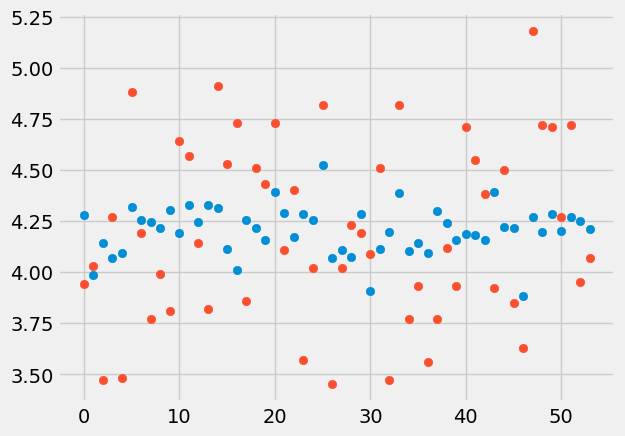

In [13]:
X = df[['word_score','letter1_int','letter2_int','letter3_int','letter4_int','letter5_int']]
y = df[['avg_num_guesses']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=42)

model=LinearRegression()
model.fit(X_train,y_train)
preds = model.predict(X_test)

print('\tmean_squared_error:', mean_squared_error(y_test, preds))
print('\tmean_absolute_error:', mean_absolute_error(y_test, preds))

plt.scatter(range(len(preds)),preds)
plt.scatter(range(len(preds)),y_test)
plt.show()

In [14]:
df['avg_num_guesses'].describe()

count    359.000000
mean       4.192340
std        0.403655
min        3.100000
25%        3.935000
50%        4.170000
75%        4.420000
max        5.990000
Name: avg_num_guesses, dtype: float64

	mean_squared_error: 8928182.47674932
	mean_absolute_error: 2569.969894182077


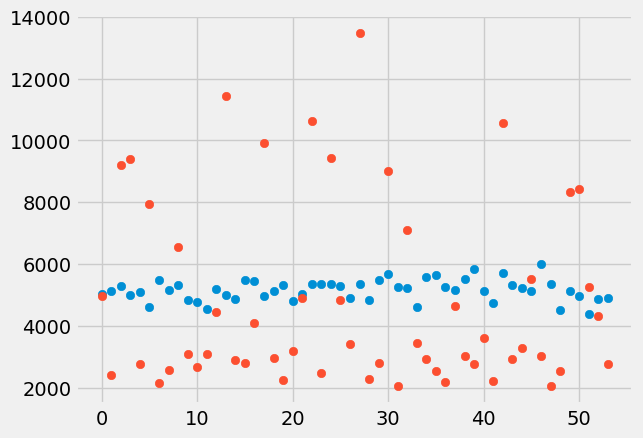

In [15]:
X = df[['word_score','letter1_int','letter2_int','letter3_int','letter4_int','letter5_int']]
y = df[['num_hardmode']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=42)

model=LinearRegression()
model.fit(X_train,y_train)
preds = model.predict(X_test)

print('\tmean_squared_error:', mean_squared_error(y_test, preds))
print('\tmean_absolute_error:', mean_absolute_error(y_test, preds))

plt.scatter(range(len(preds)),preds)
plt.scatter(range(len(preds)),y_test)
plt.show()

	mean_squared_error: 8953847.744885938
	mean_absolute_error: 2567.843507650651


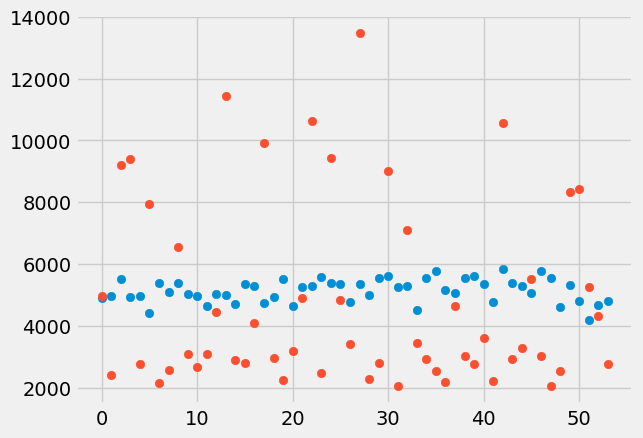

In [16]:
X = df[['word_score','letter1_int','letter2_int','letter3_int','letter4_int','letter5_int','day_of_week']]
y = df[['num_hardmode']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=42)

model=LinearRegression()
model.fit(X_train,y_train)
preds = model.predict(X_test)

print('\tmean_squared_error:', mean_squared_error(y_test, preds))
print('\tmean_absolute_error:', mean_absolute_error(y_test, preds))

plt.scatter(range(len(preds)),preds)
plt.scatter(range(len(preds)),y_test)
plt.show()

In [17]:
df.head()

,Unnamed: 0,date,contest_num,word,num_results,num_hardmode,in1,in2,in3,in4,...,letter3,letter4,letter5,letter1_int,letter2_int,letter3_int,letter4_int,letter5_int,word_score,avg_num_guesses
0,0,2022-12-31,560,manly,20380,1899,0,2,17,37,...,n,l,y,13,1,14,12,25,0.258499,4.34
1,1,2022-12-30,559,molar,21204,1973,0,4,21,38,...,l,a,r,13,15,12,1,18,0.312999,4.14
2,2,2022-12-29,558,havoc,20001,1919,0,2,16,38,...,v,o,c,8,1,22,15,3,0.233995,4.40
3,3,2022-12-28,557,impel,20160,1937,0,3,21,40,...,p,e,l,9,13,16,5,12,0.275544,4.15
4,4,2022-12-27,556,condo,20879,2012,0,2,17,35,...,n,d,o,3,15,14,4,15,0.254231,4.45
